In [2]:
import pandas as pd
import rpy2
from rpy2.robjects import r, pandas2ri

In [3]:
rpy2.__version__

'3.4.5'

In [4]:
%reload_ext rpy2.ipython

In [5]:
%%R 
result <- radiant.design::sample_size_comp(
  type = "proportion", 
  p1 = 0.51, 
  p2 = 0.52, 
  conf_lev = 0.95, 
  power = 0.8
)
summary(result)

Sample size calculation for comparison of proportions 
Sample size 1    : 39,208
Sample size 2    : 39,208
Total sample size: 78,416
Proportion 1     : 0.51 
Proportion 2     : 0.52 
Effect size      : 0.02000934 
Confidence level : 0.95 
Power            : 0.8 
Alternative      : two.sided 



In [6]:
dframe = pd.DataFrame({
    "col1": ["x", "y", "z"],
    "col2": [3, 4, 5]
})

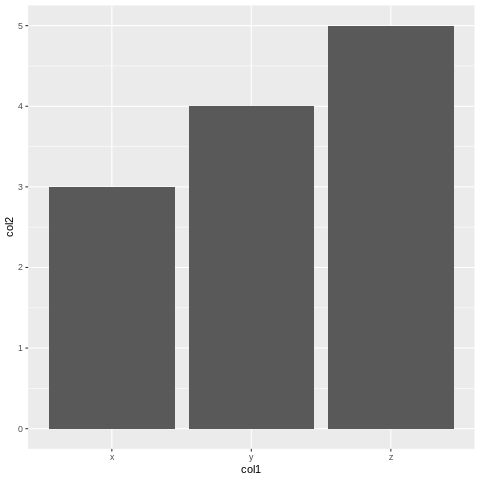

In [7]:
%%R -i dframe
library(ggplot2)
p <- ggplot(dframe, aes(x=col1, y=col2)) + geom_bar(stat="identity")
print(p)


In [8]:
%%R

rdf = data.frame(a = 1:3, b = 4:6)
rdf

  a b
1 1 4
2 2 5
3 3 6


In [9]:
# converts R objects to python types
pandas2ri.activate()

In [10]:
pydf = r['rdf']

In [11]:
pydf

,a,b
1,1,4
2,2,5
3,3,6


In [12]:
type(pydf)

pandas.core.frame.DataFrame

In [13]:
r.ls()

'dframe','p','rdf','result'


For more on connecting passing DataFrames between R and python see:
    
https://pandas.pydata.org/pandas-docs/version/0.23.0/r_interface.html